# Lab: NLTK Tweeter Data

Adapted from NLP lecture by Younes Bensouda Mourri. 2020. Natural Language Processing with Classification and Vector Spaces. DeepLearning.AI

Run code cells to learn about NLTK and Tweeter

In [1]:
# To downloads sample twitter dataset
nltk.download('twitter_samples')

NameError: name 'nltk' is not defined

In [3]:
# Import all libraries at the beginning of your code
import nltk 
import pandas as pd
from nltk.corpus import twitter_samples    # Import sample Twitter dataset from NLTK 20K tweets

import matplotlib.pyplot as plt            # Import visualization library
import random                              # pseudo-random number generator

import re                                  # regular expression library
import string                              # string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

## STEP 1. Twitter Corpus

See an example of tweet from twitter_sample corpus

In [10]:
print(twitter_samples.docs()[1])

{'contributors': None, 'coordinates': None, 'text': "Everything in the kids section of IKEA is so cute. Shame I'm nearly 19 in 2 months :(", 'user': {'screen_name': 'EveHollyHousley', 'time_zone': 'London', 'profile_background_image_url': 'http://pbs.twimg.com/profile_background_images/776873880/f89d8aa869414e41eefd804284a3d95c.jpeg', 'profile_background_image_url_https': 'https://pbs.twimg.com/profile_background_images/776873880/f89d8aa869414e41eefd804284a3d95c.jpeg', 'default_profile_image': False, 'url': None, 'profile_text_color': '333333', 'following': False, 'listed_count': 0, 'entities': {'description': {'urls': []}}, 'utc_offset': 3600, 'profile_sidebar_border_color': 'FFFFFF', 'name': 'Eve', 'favourites_count': 4759, 'followers_count': 450, 'location': 'Manchester', 'protected': False, 'notifications': False, 'profile_image_url_https': 'https://pbs.twimg.com/profile_images/620302844093181952/M7IP4ZHa_normal.jpg', 'profile_use_background_image': False, 'profile_image_url': 'htt

In [4]:
# If you are curious to see the content of twitter sample
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

Load positive and negative tweets using  `strings()` method

In [5]:
# select positive and negative tweets
positive_tweets = twitter_samples.strings('positive_tweets.json')
negative_tweets = twitter_samples.strings('negative_tweets.json')

Calculate the number of positive and negative tweets.

In [5]:
print('Number of positive tweets: ', len(positive_tweets))
print('Number of negative tweets: ', len(negative_tweets))

Number of positive tweets:  5000
Number of negative tweets:  5000


All tweets are stored in a list and each individual tweet is stored as a string.

In [6]:
print('All tweets are stored as: ', type(positive_tweets))
print('Individual tweet is stored as: ', type(negative_tweets[0]))

All tweets are stored as:  <class 'list'>
Individual tweet is stored as:  <class 'str'>


Visualize negataive and positive tweets distribution using Pie chart: (https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py)

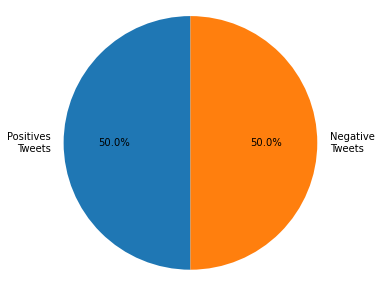

In [7]:
# Declare Figure with a custom size
fig1 = plt.figure(figsize=(5, 5))

labels = 'Positives\nTweets', 'Negative\nTweets' # labels for the two classes

sizes = [len(positive_tweets), len(negative_tweets)] # Sizes for each slide

ax1 = plt.gca() # To get the current polar axes on the current figure

# Declare pie chart, where the slices will be ordered and plotted counter-clockwise:
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', # formatting percent values
        shadow=False, startangle=90)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

# Display the chart
plt.show()

Print a random positive and a random negative tweet. Note tweets come from a public dataset and some tweets might have more explicit content.

In [8]:
# print positive tweets in greeen
print('\033[92m' + positive_tweets[random.randint(0,5000)])

# print negative tweets in red
print('\033[91m' + negative_tweets[random.randint(0,5000)])

@babagby thanks. I appreciate :)
@NikiNoox Not great right now. I'm feeling wobbly and just want to go home but I can't :(


## STEP 2. Cleaning raw text

* Remove hyperlink
* Remove hashtags (#)
* Remove retweet maarks (RT)

In [17]:
# Example with one tweet - feel free to select a different tweet. This tweet is selected sa an example with url and emojis
tweet = positive_tweets[150]  
print(tweet)

Dum Dum Andar - Ram Sampath, Sona Mohapatra &amp; Samantha Edwards Mein Tulane to razi razi, Wah! That's Josh :) http://t.co/ul8MARDfhm


In [18]:
print('\033[92m' + tweet) # original tweet

# remove retweet "RT" and replace by empty space ''. Carot (^) indicating the beginning of the string.
tweet2 = re.sub(r'^RT[\s]+', '', tweet)

# remove hyperlinks 
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)

# remove hashtags but keep the word
tweet2 = re.sub(r'#', '', tweet2)

# clean emojis if needed
# Adapted from https://stackoverflow.com/a/49146722/330558
emoji_pattern = re.compile(
    u"(\ud83d[\ude00-\ude4f])|"  # emoticons
    u"(\ud83c[\udf00-\uffff])|"  # symbols & pictographs (1 of 2)
    u"(\ud83d[\u0000-\uddff])|"  # symbols & pictographs (2 of 2)
    u"(\ud83d[\ude80-\udeff])|"  # transport & map symbols
    u"(\ud83c[\udde0-\uddff])"  # flags (iOS)
    "+", flags=re.UNICODE)

tweet2 = emoji_pattern.sub(r'', tweet2)
print('\033[94m' + tweet2) # cleaned tweet


#https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d

Dum Dum Andar - Ram Sampath, Sona Mohapatra &amp; Samantha Edwards Mein Tulane to razi razi, Wah! That's Josh :) http://t.co/ul8MARDfhm
Dum Dum Andar - Ram Sampath, Sona Mohapatra &amp; Samantha Edwards Mein Tulane to razi razi, Wah! That's Josh :) 


***

## <span style="color:red">Tweeter Tokenizer:</span> 

In [19]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)

# tokenize tweets
tweet_tokens = tokenizer.tokenize(tweet2)

print()
print('Tokenized string:')
print(tweet_tokens)


Dum Dum Andar - Ram Sampath, Sona Mohapatra &amp; Samantha Edwards Mein Tulane to razi razi, Wah! That's Josh :) 


Tokenized string:
['dum', 'dum', 'andar', '-', 'ram', 'sampath', ',', 'sona', 'mohapatra', '&', 'samantha', 'edwards', 'mein', 'tulane', 'to', 'razi', 'razi', ',', 'wah', '!', "that's", 'josh', ':)']


## Spelling Corrections

For more information check https://textblob.readthedocs.io/en/dev/quickstart.html#spelling-correction

In [36]:
from textblob import TextBlob
misspled = 'I havv goood speling!'
spel = TextBlob(misspled)
print(spel.correct())


I have good spelling!


***

### Remove stop words and punctuations

The next step is to remove stop words and punctuation. Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [15]:
#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

Reaad more about Emoticons and Emojis: https://towardsdatascience.com/text-preprocessing-for-data-scientist-3d2419c8199d

Stop words list contains some words that could be important in some contexts. You might need to customize the stop words list for some applications. 

For the punctuation, certain tokens like ':)' and '...'  could be important in some applications as they are used to express emotions. 

In [20]:
print()
print('\033[92m')
print(tweet_tokens)
print('\033[94m')

tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and  # remove stopwords
        word not in string.punctuation):  # remove punctuation
        tweets_clean.append(word)

print('removed stop words and punctuation:')
print(tweets_clean)



['dum', 'dum', 'andar', '-', 'ram', 'sampath', ',', 'sona', 'mohapatra', '&', 'samantha', 'edwards', 'mein', 'tulane', 'to', 'razi', 'razi', ',', 'wah', '!', "that's", 'josh', ':)']

removed stop words and punctuation:
['dum', 'dum', 'andar', 'ram', 'sampath', 'sona', 'mohapatra', 'samantha', 'edwards', 'mein', 'tulane', 'razi', 'razi', 'wah', "that's", 'josh', ':)']


In [21]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

# Instantiate stemming class
stemmer = PorterStemmer() 

# Create an empty list to store the stems
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('stemmed words:')
print(tweets_stem)



['dum', 'dum', 'andar', 'ram', 'sampath', 'sona', 'mohapatra', 'samantha', 'edwards', 'mein', 'tulane', 'razi', 'razi', 'wah', "that's", 'josh', ':)']

stemmed words:
['dum', 'dum', 'andar', 'ram', 'sampath', 'sona', 'mohapatra', 'samantha', 'edward', 'mein', 'tulan', 'razi', 'razi', 'wah', "that'", 'josh', ':)']


## process_tweet()

Create your own function that will incorporate all pre-proccessing cleaning steps. Feel free to work/discuss in your study groups.

In the future, you could just call that function when dealing with tweets.

Alternatively check out the function from Analytics Vidhya (2020)


In [2]:
def process_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  
                word not in string.punctuation): 
            stem_word = stemmer.stem(word)  # stemming word
            tweets_clean.append(stem_word)

    return tweets_clean

Note: string.punctuation is a pre-initialized string used as string constant and it will give you a set of punctuation symbols.

In [1]:

# import string library function 
import string # actually we already imported string at the top
    
# Storing the sets of punctuation in variable result 
result = string.punctuation 
    
# Printing the punctuation values 
print(result) # import string library function 

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


## STEP 3. Feature Extraction

Using process_tweet function and Count vectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [12]:
clean_tweets = [process_tweet(tweet) for tweet in positive_tweets]

In [13]:
clean_tweets[1]

['hey', 'jame', 'odd', ':/', 'pleas', 'call', 'contact', 'centr', '02392441234', 'abl', 'assist', ':)', 'mani', 'thank']

### Count Vectorizer

CountVectorizer has a parameter analyzer which is by default 'word'. Here we can replace it by our own customized tokenizer - process_tweet

See https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [43]:
count_vectorizer = CountVectorizer(analyzer=process_tweet).fit(positive_tweets)

# Print total number of vocab words
print(len(count_vectorizer.vocabulary_))

6623


Let us look at vector representation

transform all tweets and extract BOW

In [46]:
tweet_bow = count_vectorizer.transform(positive_tweets)
print('Shape of Sparse Matrix: ', tweet_bow.shape)
print('Amount of Non-Zero occurences: ', tweet_bow.nnz)

Shape of Sparse Matrix:  (5000, 6623)
Amount of Non-Zero occurences:  32632


### Some exploration of Count Vectorizer samples

In [44]:
print(count_vectorizer.get_feature_names()[:10])

['(-:', '(:', '):', ');', '--->', '-->', '->', '.\n.\n.', '. .', '. . .']


In [45]:
bow14 = count_vectorizer.transform([positive_tweets[14]])
print(bow14)
print(bow14.shape)
print(positive_tweets[14])

  (0, 58)	1
  (0, 63)	1
  (0, 274)	1
  (0, 401)	1
  (0, 1933)	1
  (0, 2329)	1
  (0, 2362)	1
  (0, 2471)	1
  (0, 3138)	1
  (0, 3973)	1
  (0, 4176)	1
  (0, 5022)	1
  (0, 5823)	1
(1, 6623)
Great new opportunity for junior triathletes aged 12 and 13 at the Gatorade series! Get your entries in :) http://t.co/of3DyOzML0


If you are curious to see the sparce matrix with transform tokens, select a small sample and fit_transform it

In [48]:
sample = positive_tweets[:5]
Z = count_vectorizer.fit_transform(sample)
# Original concept https://gist.github.com/larsmans/3745866
print(pd.DataFrame(Z.A, columns=count_vectorizer.get_feature_names()).to_string())

print("--------------------------------------------------")
print(sample[1])

   02392441234  15  :)  :/  abl  accnt  amaz  assist  bleed  blue  call  centr  commun  congrat  contact  day  engag  fb  followfriday  got  hey  jame  last  listen  mani  mark  member  night  odd  pleas  profil  rqst  scotland  succeed  thank  tick  top  track  verifi  week  yeaaah  yipppi
0            0   0   1   0    0      0     0       0      0     0     0      0       1        0        0    0      1   0             1    0    0     0     0       0     0     0       1      0    0      0       0     0         0        0      0     0    1      0       0     1       0       0
1            1   0   1   1    1      0     0       1      0     0     1      1       0        0        1    0      0   0             0    0    1     1     0       0     1     0       0      0    1      1       0     0         0        0      1     0    0      0       0     0       0       0
2            0   0   1   0    0      0     1       0      1     0     0      0       0        0        0    0      0   0    

### Find the most frequent words in positive tweets from BOW

In [50]:
sum_words = tweet_bow.sum(axis=0)

In [52]:
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [54]:
print(words_freq[:10])

[('commun', 289), ('centr', 128), ('rqst', 75), ('thank', 16), ('week', 8), (':)', 7), ('profil', 4), ('call', 3), ('congrat', 3), ('hey', 2)]


Resources:
- https://medium.com/swlh/natural-language-processing-in-python-with-code-part-ii-18c8742762a4
- https://medium.com/@meetnandu996/natural-language-processing-in-python-with-code-part-i-7736e3b112ab
- https://medium.com/analytics-vidhya/natural-language-processing-ed71ff6e41f2